In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
# import datetime as dttm

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [10]:
inspector.get_columns("measurement")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
inspector.get_columns("station")

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
engine.execute("select * from station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [13]:
pastyear = session.query(measurement.date).order_by(measurement.date.desc()).first()

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
maxDate = dt.date(2017,8,23)
year_ago = maxDate - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [15]:
# Calculate the date 1 year ago from the last data point in the database


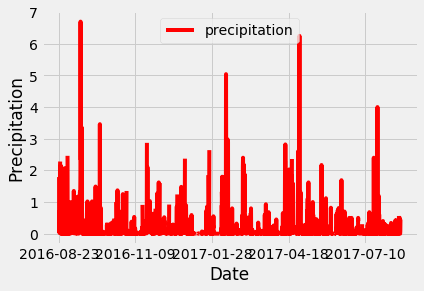

In [16]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = [measurement.date, measurement.prcp]

prcp_data = session.query(*precipitation_data).\
    filter(measurement.date<=maxDate).\
    filter(measurement.date>=year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(prcp_data, columns=["date","precipitation"])
precipitation_df.head()

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="date", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date", y="precipitation", color = "red")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig("Resources/Precipitation.png")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
n_stations = session.query(station).group_by(station.station).count()
print(f"Number of Available Stations: {n_stations}")

Number of Available Stations: 9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(f"The Most Active Stations are the following:") 
most_active_stations

The Most Active Stations are the following:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = most_active_stations[0][0]
active_temperatures = session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == most_active_station).all()

print(f"The most active station temperatures are:")
print(f"Low: {active_temperatures[0][0]} High: {active_temperatures[0][1]} Average: {round(active_temperatures[0][2], 1)}")

The most active station temperatures are:
Low: 85.0 High: 54.0 Average: 71.7


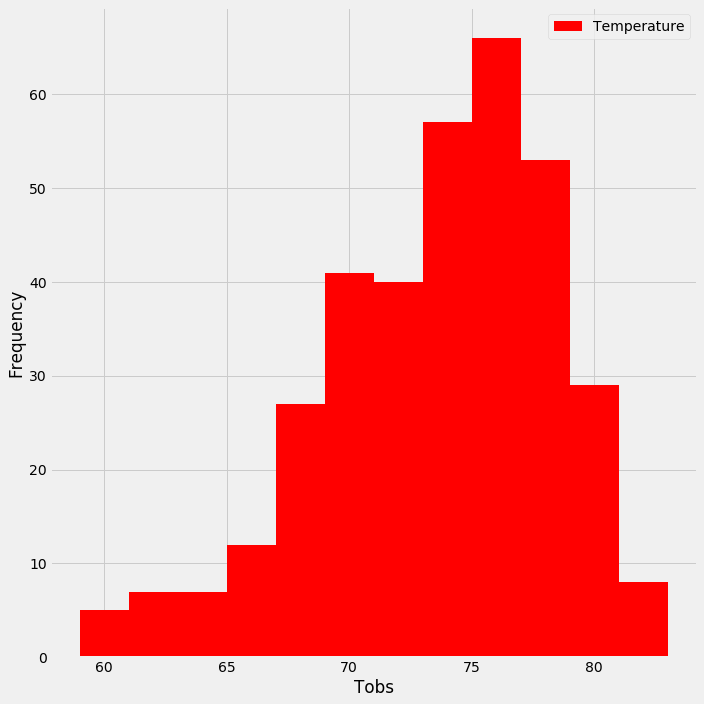

In [21]:
# Choose the station with the highest number of temperature observations.
most_observations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).first()
most_observations

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temperatures = session.query(measurement.tobs).filter(measurement.date >= "2016-08-23").filter(measurement.station == "USC00519281").all()
#last_year_temps
last_year_temperatures = pd.DataFrame(last_year_temperatures, columns = ["Temperature"])

# graph
last_year_temperatures.plot.hist(bins = 12, color = "red")
plt.xlabel("Tobs")
plt.tight_layout()
plt.savefig("Resources/tobs_histogram.png")